## **NEWS ARTICLES SENTIMENT ANALYSIS AND TOPIC MODELING**


In [ ]:
import requests, json
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from google.colab import files
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import collections
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
uploaded = files.upload()

Saving finished_data_breitbart.json to finished_data_breitbart.json


In [ ]:
uploaded = files.upload()

Saving finished_data_fox.json to finished_data_fox.json


In [ ]:
uploaded = files.upload()

Saving finished_data_newsmax.json to finished_data_newsmax.json


In [ ]:
breitbart = []
with open("finished_data_breitbart.json","r",encoding='utf-8') as fd:
    for line in fd.readlines():
        breitbart.append(json.loads(line.strip()))
fox = []
with open("finished_data_fox.json","r",encoding='utf-8') as fd:
    for line in fd.readlines():
        fox.append(json.loads(line.strip()))
newsmax = []
with open("finished_data_newsmax.json","r",encoding='utf-8') as fd:
    for line in fd.readlines():
        newsmax.append(json.loads(line.strip()))

In [ ]:
breitbart = pd.DataFrame(breitbart)
fox = pd.DataFrame(fox)
newsmax = pd.DataFrame(newsmax)

In [ ]:
breitbart = breitbart.replace('\n','', regex=True)
fox = fox.replace('\n','', regex=True)
newsmax = newsmax.replace('\n','', regex=True)

In [ ]:
# converting dates
breitbart['date'] = pd.to_datetime(breitbart['date'])
fox['date'] = pd.to_datetime(fox['date'])
newsmax['date'] = pd.to_datetime(newsmax['date'])

/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1212: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1212: UnknownTimezoneWarning: tzname EST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


In [ ]:
breitbart

,title,text,date,author,url
0,Convenient Timing: EU Investigates Le Pen Ahea...,PARIS (AP) – Paris prosecutors are studying a ...,2022-04-18,Breitbart London,https://www.breitbart.com/europe/2022/04/18/co...
1,Kamala Harris Uses 'Wordle' Phone Game as a 'B...,Vice President Kamala Harris plays the popular...,2022-04-18,Charlie Spiering,https://www.breitbart.com/politics/2022/04/18/...
2,BLM Nuttery: Park May be Given Name of Gaff Pr...,Leftist politicians in one local council in Br...,2022-04-18,Peter Caddle,https://www.breitbart.com/europe/2022/04/18/bl...
3,Brexit Blunder: Migrant Worker Visas Increase ...,Boris Johnson’s post-Brexit immigration scheme...,2022-04-18,Kurt Zindulka,https://www.breitbart.com/europe/2022/04/18/bo...
4,Durham: Five Hillary Clinton Associates Are Ta...,Five associates of Hillary Clinton and her pre...,2022-04-18,Joel B. Pollak,https://www.breitbart.com/politics/2022/04/18/...
...,...,...,...,...,...
5995,Italy: 80-Year-Old Sergio Mattarella Secures S...,ROME (AP) – Italian President Sergio Mattarell...,2022-01-29,Breitbart London,https://www.breitbart.com/europe/2022/01/29/it...
5996,Five Human Smuggling Attempts Foiled in South ...,Border Patrol agents in the Texas Rio Grande V...,2022-01-29,Randy Clark,https://www.breitbart.com/border/2022/01/29/fi...
5997,Bette Midler Attacks West Virginia Gov. Jim Ju...,Left-wing actress Bette Midler attacked West V...,2022-01-29,Alana Mastrangelo,https://www.breitbart.com/entertainment/2022/0...
5998,VIDEO: Suspect in Shooting of Milwaukee Office...,The suspect who exchanged gunfire with a Milwa...,2022-01-29,Amy Furr,https://www.breitbart.com/crime/2022/01/29/vid...


In [ ]:
fox

,title,text,date,author,url
0,Russia-Ukraine: Zelenskyy to deliver virtual a...,Ukrainian President Volodymyr Zelenskyy is exp...,2022-03-14 10:14:00,Brooke Singman,https://www.foxnews.com/politics/zelenskyy-to-...
1,Russia-Ukraine war: Congress eyes MiG-29 fight...,Biden admin worries about potential escalation...,2022-03-14 09:55:00,Tyler Olson,https://www.foxnews.com/politics/ukraine-russi...
2,Trump-backed Wyoming GOP primary challenger Ha...,Hageman spotlights Cheney's roots in Northern ...,2022-03-14 08:10:00,Paul Steinhauser,https://www.foxnews.com/politics/trump-backed-...
3,Web designer who refuses to create sites for s...,Lorie Smith says Colorado is violating her Fir...,2022-03-14 07:33:00,Ronn Blitzer,https://www.foxnews.com/politics/lorie-smith-w...
4,Biden's home state election law trouble: Lawsu...,Delaware resident says law that takes effect t...,2022-03-14 06:19:00,Fred Lucas,https://www.foxnews.com/politics/biden-delawar...
...,...,...,...,...,...
3530,California rule addressing 'unconscious bias' ...,The rule is part of a growing trend to curb at...,2021-12-29 09:58:00,Ronn Blitzer,https://www.foxnews.com/politics/california-ru...
3531,San Francisco father of murdered 6-year-old sa...,San Francisco is 'doomed' with Chesa Boudin as...,2021-12-29 08:55:00,Jon Michael Raasch,https://www.foxnews.com/politics/san-francisco...
3532,Democratic committee’s new hire supports 'abol...,"RaeAnn Ensworth said of police, 'I have always...",2021-12-29 08:49:00,Houston Keene,https://www.foxnews.com/politics/dcccs-new-hir...
3533,Surge in House Democratic 2022 retirement anno...,House GOP leader Kevin McCarthy in August pred...,2021-12-29 07:46:00,Paul Steinhauser,https://www.foxnews.com/politics/house-democra...


In [ ]:
newsmax

,title,text,date,author,url
0,Panetta: Send Ukraine Every Weapon We Can,Former United States Secretary of Defense Leon...,2022-04-17 21:26:00,Nick Koutsobinas,https://www.newsmax.com/politics/leon-panetta-...
1,Former Head of US Army in Europe: $800M in Aid...,The former head of the U.S. Army in Europe tol...,2022-04-17 18:45:00,Nick Koutsobinas,https://www.newsmax.com/politics/russia-ukrain...
2,Some Skeptical Biden's Student-Debt Action Wil...,The White House earlier this week said canceli...,2022-04-17 16:00:00,Eric Mack,https://www.newsmax.com/politics/student-loan-...
3,Catholic Charities Nun Decries Traffickers Tak...,The executive director of the Catholic Chariti...,2022-04-17 13:53:00,Fran Beyer,https://www.newsmax.com/politics/catholic-char...
4,COVID Coordinator: Latest Variant Surge Won't ...,"The White House COVID coordinator, Dr. Ashish ...",2022-04-17 13:29:00,Fran Beyer,https://www.newsmax.com/politics/ashish-jha-va...
...,...,...,...,...,...
8585,Kamala Harris' Staff Suffering From Low Morale...,Vice President Kamala Harris' office has been ...,2021-07-01 09:28:00,Jeffrey Rodack,https://www.newsmax.com/politics/kamala-harris...
8586,Mark Morgan to Newsmax: Trump Texas Tour a 'Tr...,Former President Donald Trump's visit to the R...,2021-07-01 08:49:00,Sandy Fitzgerald,https://www.newsmax.com/politics/morgan-trump-...
8587,Trump Strengthened by Manhattan DA Indictment ...,Former President Donald Trump was energized by...,2021-07-01 08:44:00,Charlie McCarthy,https://www.newsmax.com/politics/president-tru...
8588,Biden to Meet With Families of Condo Collapse ...,President Joe Biden will meet on Thursday in S...,2021-07-01 08:01:00,Jeffrey Rodack,https://www.newsmax.com/politics/biden-surfsid...


In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')
wnl = nltk.WordNetLemmatizer()
type(wnl)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


nltk.stem.wordnet.WordNetLemmatizer

In [ ]:
textb = " ".join(d for d in breitbart.text.astype(str))

In [ ]:
textf = " ".join(d for d in fox.text.astype(str))

In [ ]:
textn = " ".join(d for d in newsmax.text.astype(str))

In [ ]:
title = " ".join(d for d in breitbart.title.astype(str))

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
new_words=('say','u', 'said', 'says')
for i in new_words:
    stopwords.append(i)
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
mask = (breitbart['date'] > '2022-02-01') & (breitbart['date'] <= '2022-02-14') # select a period
df1 = breitbart.loc[mask]
title01 = " ".join(d for d in df1.title.astype(str))

stop_pat = r'\b(?:{})\b'.format('|'.join(stopwords))

def ReturnCleanText(text):
         text = text.lower()
         text = re.sub(r"\W+|_", ' ', text)
         return re.sub(stop_pat, '', text)

df1.title = df1.title.apply(ReturnCleanText)

df1tokens=nltk.word_tokenize("/n".join(df1.title))
df1lemma = [wnl.lemmatize(t) for t in df1tokens]

count1 = collections.Counter(df1lemma)
word_freq1 = pd.DataFrame(count1.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
mask2 = (fox['date'] > '2022-02-01') & (fox['date'] <= '2022-02-14')
df2 = fox.loc[mask2]
title02 = " ".join(d for d in df2.title.astype(str))

stop_pat = r'\b(?:{})\b'.format('|'.join(stopwords))  

def ReturnCleanText(text):
         text = text.lower()
         text = re.sub(r"\W+|_", ' ', text)
         return re.sub(stop_pat, '', text)

df2.title = df2.title.apply(ReturnCleanText)

df2tokens=nltk.word_tokenize("/n".join(df2.title))
df2lemma = [wnl.lemmatize(t) for t in df2tokens]

count2 = collections.Counter(df2lemma)
word_freq2 = pd.DataFrame(count2.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
mask3 = (newsmax['date'] > '2022-02-01') & (newsmax['date'] <= '2022-02-14')
df3 = fox.loc[mask3]
title03 = " ".join(d for d in df3.title.astype(str))

stop_pat = r'\b(?:{})\b'.format('|'.join(stopwords))  

def ReturnCleanText(text):
         text = text.lower()
         text = re.sub(r"\W+|_", ' ', text)
         return re.sub(stop_pat, '', text)

df3.title = df3.title.apply(ReturnCleanText)

df3tokens=nltk.word_tokenize("/n".join(df3.title))
df3lemma = [wnl.lemmatize(t) for t in df3tokens]

count3 = collections.Counter(df3lemma)
word_freq3 = pd.DataFrame(count3.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


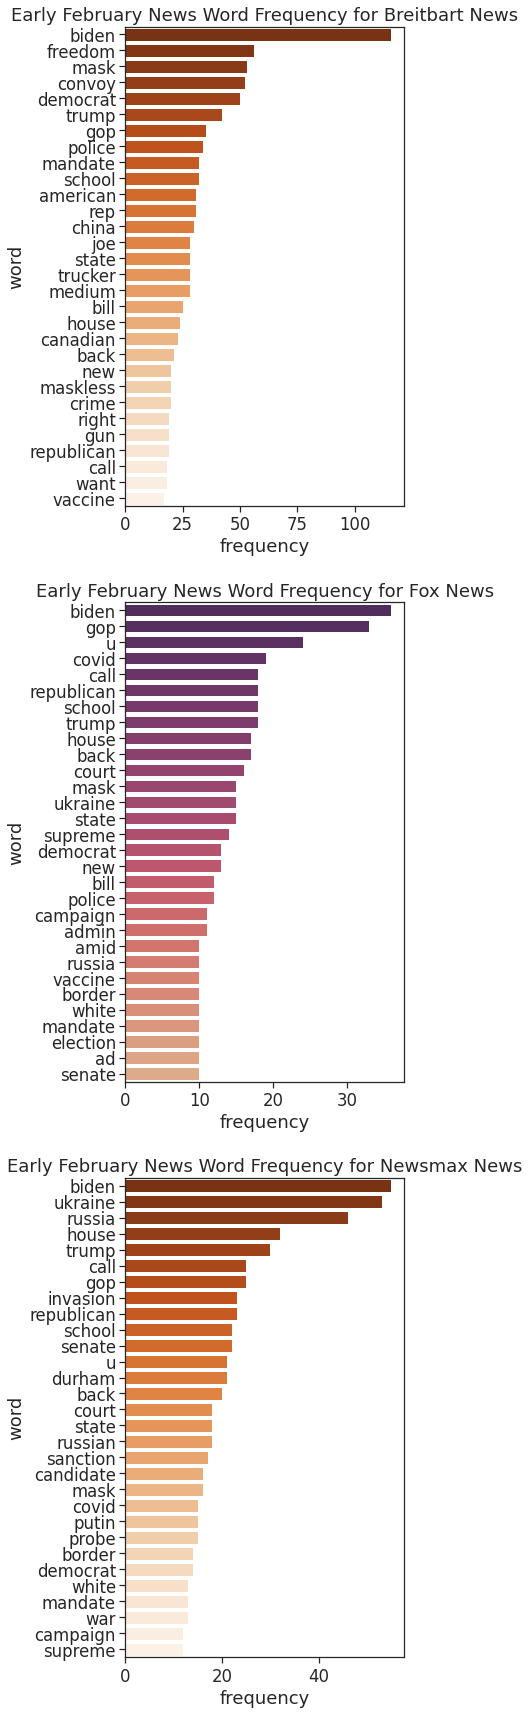

In [ ]:
fig, axes = plt.subplots(3,1,figsize=(5,30))
sns.set(font_scale = 1.5)
sns.barplot(ax=axes[0],x='frequency', y='word', data=word_freq1.head(30), palette="Oranges_r").set(title='Early February News Word Frequency for Breitbart News')
sns.barplot(ax=axes[1],x='frequency', y='word', data=word_freq2.head(30), palette="flare_r").set(title='Early February News Word Frequency for Fox News')
sns.barplot(ax=axes[2],x='frequency', y='word', data=word_freq3.head(30), palette="Oranges_r").set(title='Early February News Word Frequency for Newsmax News')
sns.set_style("ticks")

In [ ]:
mask = (breitbart['date'] > '2022-03-01') & (breitbart['date'] <= '2022-03-14') # select a period
df1 = breitbart.loc[mask]
title01 = " ".join(d for d in df1.title.astype(str))

stop_pat = r'\b(?:{})\b'.format('|'.join(stopwords))  

def ReturnCleanText(text):
         text = text.lower()
         text = re.sub(r"\W+|_", ' ', text)
         return re.sub(stop_pat, '', text)

df1.title = df1.title.apply(ReturnCleanText)

df1tokens=nltk.word_tokenize("/n".join(df1.title))
df1lemma = [wnl.lemmatize(t) for t in df1tokens]

count1 = collections.Counter(df1lemma)
word_freq1 = pd.DataFrame(count1.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
mask2 = (fox['date'] > '2022-03-01') & (fox['date'] <= '2022-03-14')
df2 = fox.loc[mask2]
title02 = " ".join(d for d in df2.title.astype(str))

stop_pat = r'\b(?:{})\b'.format('|'.join(stopwords))  

def ReturnCleanText(text):
         text = text.lower()
         text = re.sub(r"\W+|_", ' ', text)
         return re.sub(stop_pat, '', text)

df2.title = df2.title.apply(ReturnCleanText)

df2tokens=nltk.word_tokenize("/n".join(df2.title))
df2lemma = [wnl.lemmatize(t) for t in df2tokens]

count2 = collections.Counter(df2lemma)
word_freq2 = pd.DataFrame(count2.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
mask3 = (newsmax['date'] > '2022-03-01') & (newsmax['date'] <= '2022-03-14')
df3 = fox.loc[mask3]
title03 = " ".join(d for d in df3.title.astype(str))

stop_pat = r'\b(?:{})\b'.format('|'.join(stopwords))  

def ReturnCleanText(text):
         text = text.lower()
         text = re.sub(r"\W+|_", ' ', text)
         return re.sub(stop_pat, '', text)

df3.title = df3.title.apply(ReturnCleanText)

df3tokens=nltk.word_tokenize("/n".join(df3.title))
df3lemma = [wnl.lemmatize(t) for t in df3tokens]

count3 = collections.Counter(df3lemma)
word_freq3 = pd.DataFrame(count3.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


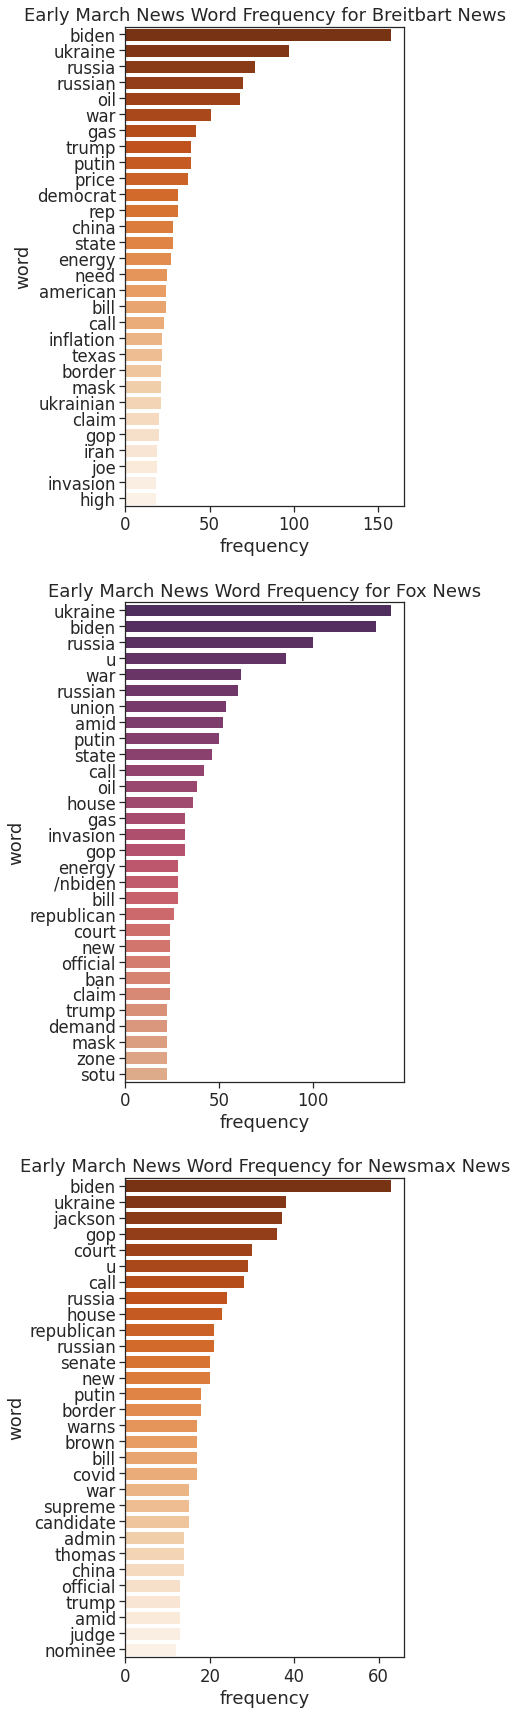

In [ ]:
fig, axes = plt.subplots(3,1,figsize=(5,30))
sns.set(font_scale = 1.5)
sns.barplot(ax=axes[0],x='frequency', y='word', data=word_freq1.head(30), palette="Oranges_r").set(title='Early March News Word Frequency for Breitbart News')
sns.barplot(ax=axes[1],x='frequency', y='word', data=word_freq2.head(30), palette="flare_r").set(title='Early March News Word Frequency for Fox News')
sns.barplot(ax=axes[2],x='frequency', y='word', data=word_freq3.head(30), palette="Oranges_r").set(title='Early March News Word Frequency for Newsmax News')
sns.set_style("ticks")

In [ ]:
tokens=nltk.word_tokenize(textb)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
mywords = [w.lower() for w in tokens]
revisedwords = [w for w in mywords if w.isalpha()] #words only

In [ ]:
stopwords=nltk.corpus.stopwords.words("english")
tokentext=[w for w in revisedwords if not w in stopwords] #remove all the stop words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def apwords(words):
    filtered_sentence = []
    words = nltk.word_tokenize(words)
    for w in words:
        filtered_sentence.append(w)
    return filtered_sentence
addwords = lambda x: apwords(x)
breitbart['words'] = breitbart['text'].apply(addwords)

In [ ]:
def apwords(words):
    filtered_sentence = []
    words = nltk.word_tokenize(words)
    for w in words:
        filtered_sentence.append(w)
    return filtered_sentence
addwords = lambda x: apwords(x)
fox['words'] = fox['text'].apply(addwords)

In [ ]:
def apwords(words):
    filtered_sentence = []
    words = nltk.word_tokenize(words)
    for w in words:
        filtered_sentence.append(w)
    return filtered_sentence
addwords = lambda x: apwords(x)
newsmax['words'] = newsmax['text'].apply(addwords)

In [ ]:
stopwords = STOPWORDS.update(['say','says','said','saying'])

In [ ]:
text01 = " ".join(d for d in breitbart.text.astype(str))

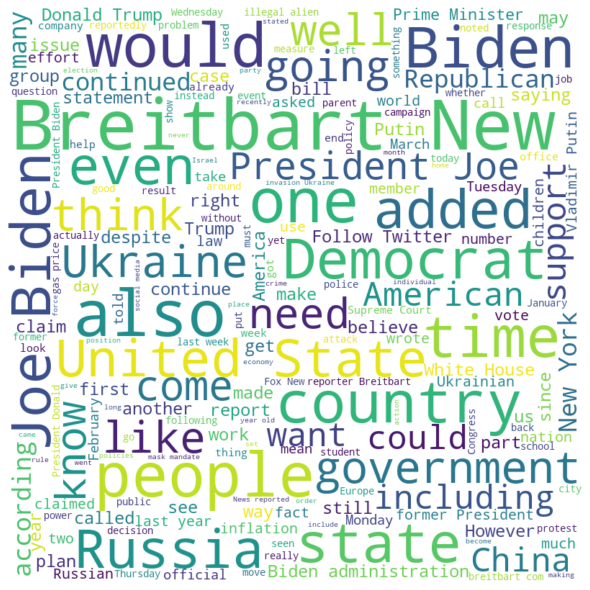

In [ ]:
wc = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10,
                stopwords = stopwords)
wc.generate(text01)
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc,interpolation = 'bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
text02 = " ".join(d for d in fox.text.astype(str))

In [ ]:
uploaded = files.upload()

Saving rep.png to rep (1).png


In [ ]:
from PIL import Image

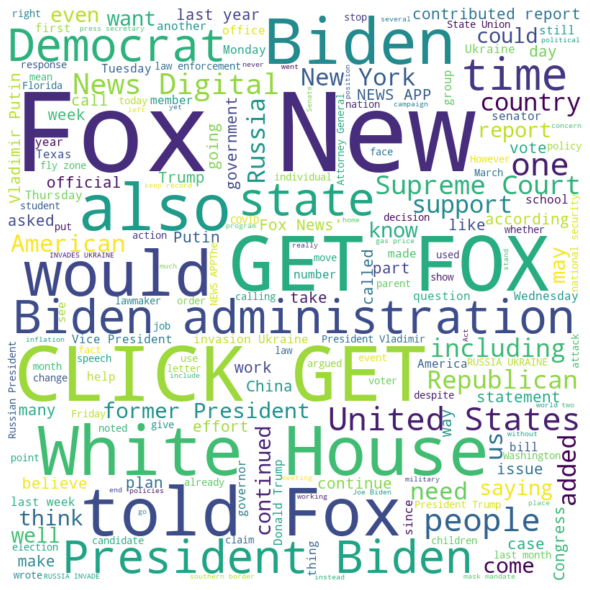

In [ ]:
#mask = np.array(Image.open('rep.png'))
wc = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 2,
               stopwords = stopwords,)
               #mask = mask)
wc.generate(text02)
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc,interpolation = 'bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
text03 = " ".join(d for d in newsmax.text.astype(str))

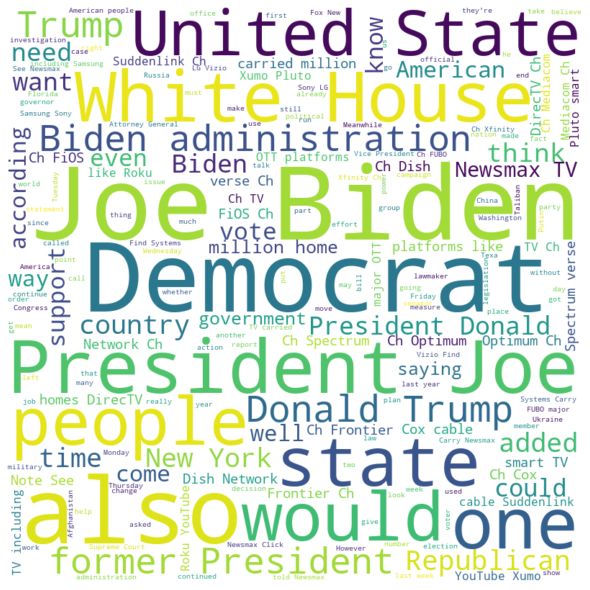

In [ ]:
wc = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10,
               stopwords = stopwords)
wc.generate(text03)
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc,interpolation = 'bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

In [ ]:
breitbart['polarity'] = ''
for i,x in breitbart.text.iteritems():
    label = TextBlob(x)
    breitbart['polarity'][i] = label.sentiment.polarity

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


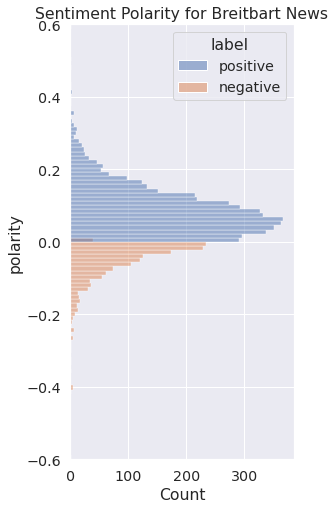

In [ ]:
plt.figure(figsize=(4,8))
sns.set(font_scale = 1.3)
sns.histplot(data=breitbart, y=breitbart.polarity,hue=breitbart.label).set(title='Sentiment Polarity for Breitbart News')
plt.ylim(-0.6,0.6)
plt.show()

In [ ]:
def polarity_to_label(x):
    if(x <= 0):
        return 'negative'
    if(x > 0):
        return 'positive'
breitbart.label = breitbart.polarity.apply(polarity_to_label)

In [ ]:
breitbart.label.value_counts()

pos    4571
neg    1429
Name: label, dtype: int64

In [ ]:
fox['polarity'] = ''
for i,x in fox.text.iteritems():
    label = TextBlob(x)
    fox['polarity'][i] = label.sentiment.polarity

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
def polarity_to_label(x):
    if(x <= 0):
        return 'negative'
    if(x > 0):
        return 'positive'
fox.label = fox.polarity.apply(polarity_to_label)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


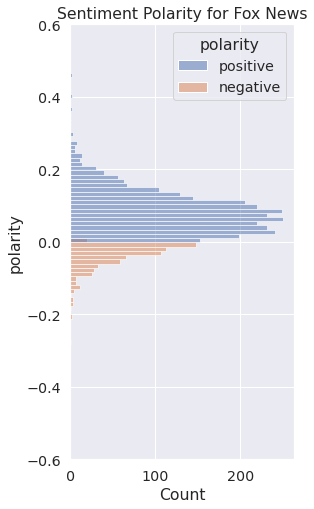

In [ ]:
plt.figure(figsize=(4,8))
sns.set(font_scale = 1.3)
sns.histplot(data=fox, y=fox.polarity,hue=fox.label).set(title='Sentiment Polarity for Fox News')
plt.ylim(-0.6,0.6)
plt.show()

In [ ]:
fox.label.value_counts()

positive    2900
negative     635
Name: label, dtype: int64

In [ ]:
newsmax['polarity'] = ''
for i,x in newsmax.text.iteritems():
    label = TextBlob(x)
    newsmax['polarity'][i] = label.sentiment.polarity

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
def polarity_to_label(x):
    if(x <= 0):
        return 'negative'
    if(x > 0):
        return 'positive'
newsmax.label = newsmax.polarity.apply(polarity_to_label)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


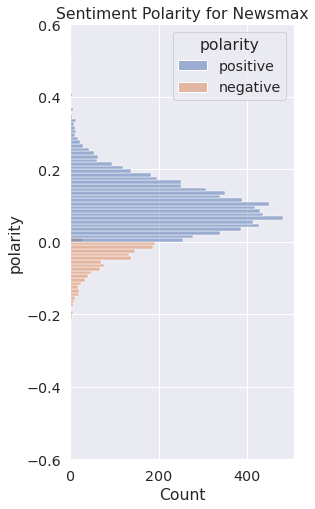

In [ ]:
plt.figure(figsize=(4,8))
sns.set(font_scale = 1.3)
sns.histplot(data=newsmax, y=newsmax.polarity,hue=newsmax.label).set(title='Sentiment Polarity for Newsmax')
plt.ylim(-0.6,0.6)
plt.show()

In [ ]:
newsmax.label.value_counts()

positive    7301
negative    1289
Name: label, dtype: int64

In [ ]:
newsmax.to_csv("newsmax.csv", encoding='utf-8')
files.download('newsmax.csv') #download the csv file

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
breitbart.to_csv("breitbart.csv", encoding='utf-8')
files.download('breitbart.csv') #download the csv file

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
fox.to_csv("fox.csv", encoding='utf-8')
files.download('fox.csv') #download the csv file

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>